# Adversarial Search: Playing Connect 4

Student Name: Leilani Guzman

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

**Your code/answer goes here.**

- **Initial State**: The initial state of the connect 4 game is an empty board, which is setup as a 6x7 array/grid. The array is filled with 0's, which represent empty spaces, and each player is represented by either a 1 or -1.

- **Actions**: The actions are the nonfull columns (using column number) that the player can drop their piece into.

- **Transition Model**: The transition model takes the current state of the board along with the action (column number to play at), and produces the resulting board of adding that players piece to that column.

- **Goal State**: The goal state is when either player has 4 consecutive pieces in a row, column, or a diagonal. The goal state could also be a tie if the entire board is filled but neither player has 4 consecutive pieces.

How big is the state space? Give an estimate and explain it.

- ANSWER HERE

How big is the game tree that minimax search will go through? Give an estimate and explain it.
- The size of the game tree for minimax search 

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [3]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

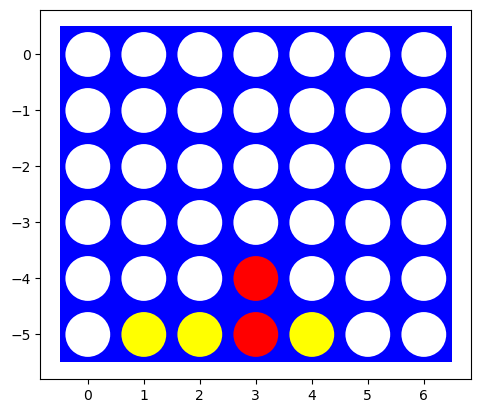

In [4]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [5]:
# Your code/ answer goes here. 1 is red, -1 is yellow

def available_actions(board):
    # Columns that can be played
    return [i for i in range(len(board[0])) if board[0][i] == 0]


def result(board, action, player):
    # Action is the column to play
    # Player is 1 or -1
    new_board = np.copy(board)
    for i in range(len(board)):
        # If the column is empty
        if i == len(board)-1 and board[i][action] == 0:
            new_board[i][action] = player
            return new_board
        if board[i][action] != 0:
            new_board[i-1][action] = player
            return new_board

# terminal states
def check_for_wins(board):
    # Check for horizontal wins
    for row in range(len(board)):
        for col in range(len(board[row])-3):
            if board[row][col] == board[row][col+1] == board[row][col+2] == board[row][col+3] and board[row][col] != 0:
                # print('Found a horizontal win')
                return board[row][col]

    # Check for vertical
    for col in range(len(board[0])):
        for row in range(len(board)-3):
            if board[row][col] == board[row+1][col] == board[row+2][col] == board[row+3][col] and board[row][col] != 0:
                # print('Found a vertical win')
                return board[row][col]
    
    # Check for diagonal left to right
    for row in range(len(board)-3):
        for col in range(len(board)-3):
            if board[row][col] == board[row+1][col+1] == board[row+2][col+2] == board[row+3][col+3] and board[row][col] != 0:
                # print('Found a diagonal win')
                return board[row][col]
    
    # Check for diagonal right to left
    for row in range(len(board)-3):
        for col in range(3, len(board)):
            if board[row][col] == board[row+1][col-1] == board[row+2][col-2] == board[row+3][col-3] and board[row][col] != 0:
                # print('Found a diagonal win2')
                return board[row][col]
    
    # If no zeros are found, the board is full, check every space and return 0 if no 0's are found
    has_zeros = False
    for row in range(len(board)):
        for col in range(len(board[row])):
            if board[row][col] == 0:
                has_zeros = True
    if not has_zeros:
        return 0
    
    # If no wins are found, return None
    return None


def utility(board, player):
    # If player wins, return 1
    if check_for_wins(board) == player:
        return 1
    # If player loses, return -1
    elif check_for_wins(board) == -player:
        return -1
    # If draw, return 0
    elif check_for_wins(board) == 0:
        return 0
    # If game is not over, return None
    else:
        return None


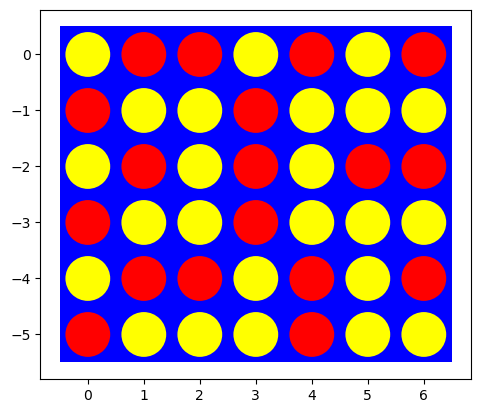

0


In [6]:
full_board = [[-1, 1, 1, -1, 1, -1, 1],
              [ 1,-1,-1,1,-1,-1,-1],
              [-1, 1, -1, 1, -1, 1, 1],
              [ 1,-1,-1,1,-1,-1,-1],
              [-1, 1, 1, -1, 1, -1, 1],
              [ 1,-1,-1,-1,1,-1,-1]]

visualize(full_board)
print(check_for_wins(full_board))

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [7]:
# Your code/ answer goes here.

class random_agent:
    def __init__(self, player):
        self.player = player

    def play(self, board):
        return np.random.choice(available_actions(board))

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [8]:
# Your code/ answer goes here.

player1 = random_agent(1)
player2 = random_agent(-1)

player1_wins = 0 # red
player2_wins = 0 # yellow
ties = 0

for _ in range(1000):
    current_player = player1
    board = empty_board()
    while True:
        end = check_for_wins(board)
        if end is not None:
            if end == 1:
                player1_wins += 1
            elif end == -1:
                player2_wins += 1
            else:
                ties += 1
            break
        action = current_player.play(board)
        board = result(board, action, current_player.player)
        current_player = player2 if current_player == player1 else player1

print('Player 1 wins:', player1_wins)
print('Player 2 wins:', player2_wins)
print('Ties:', ties)

Player 1 wins: 522
Player 2 wins: 470
Ties: 8


**Explain results**

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [9]:
# Write code for minimax search with alpha-beta pruning here.

def alphabetasearch(board, player):
    _, move = max_value(board, player, -np.inf, np.inf)
    return move

def max_value(board, player, alpha, beta):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return max value of min_value
    v = -np.inf
    best_action = None
    for action in available_actions(board):
        new_board = result(board, action, player)
        value, _ = min_value(new_board, player, alpha, beta)
        if value > v:
            v, best_action = value, action
        alpha = max(alpha, v)
        if v >= beta:
            break
    return v, best_action

def min_value(board, player, alpha, beta):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return min value of max_value
    v = np.inf
    best_action = None
    for action in available_actions(board):
        new_board = result(board, action, player)
        value, _ = max_value(new_board, player*-1, alpha, beta)
        if value < v:
            v, best_action = value, action
        beta = min(beta, v)
        if v <= alpha:
            break
    return v, best_action


In [10]:
class alphabeta_agent:
    def __init__(self, player):
        self.player = player
    def play(self, board):
        return alphabetasearch(board, self.player)

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

Board_1 before:


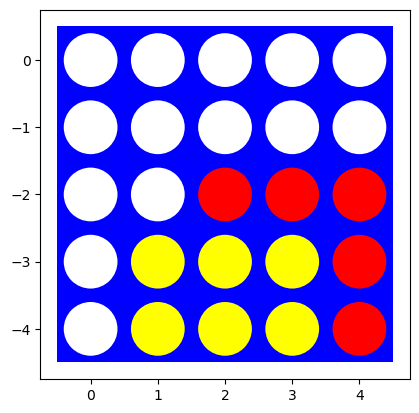

Board_1 after:


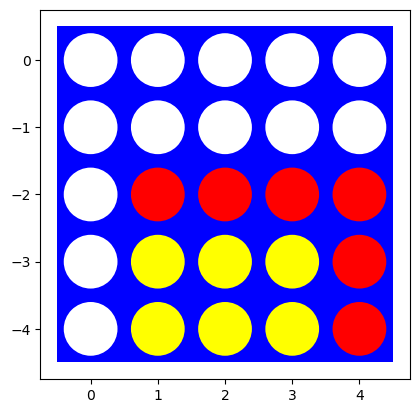

Board_2 before:


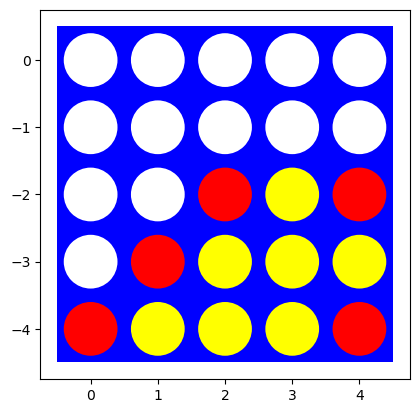

Board_2 after:


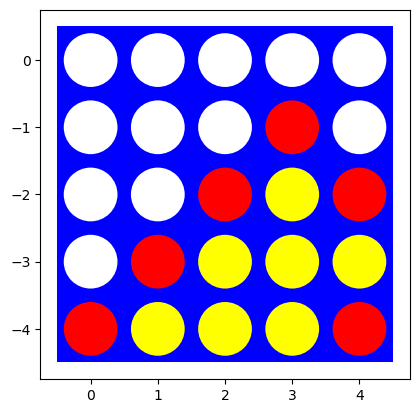

Board_3 before:


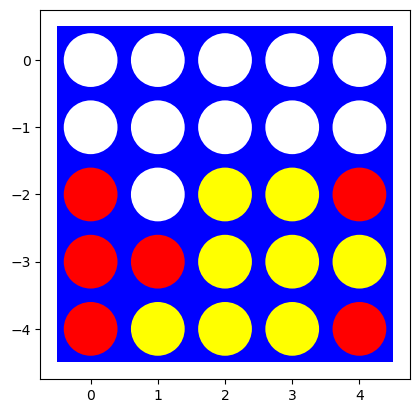

Board_3 after:


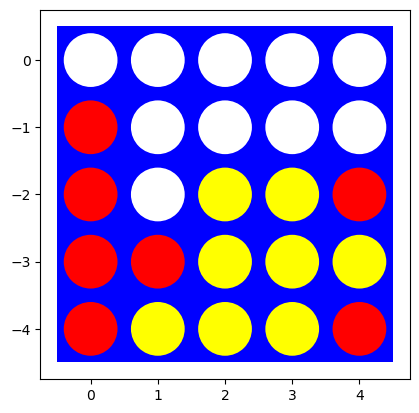

Board_4 before:


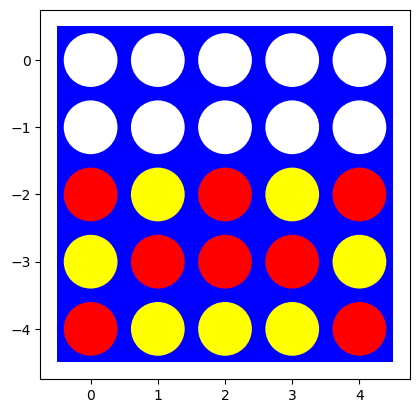

Board_4 after:


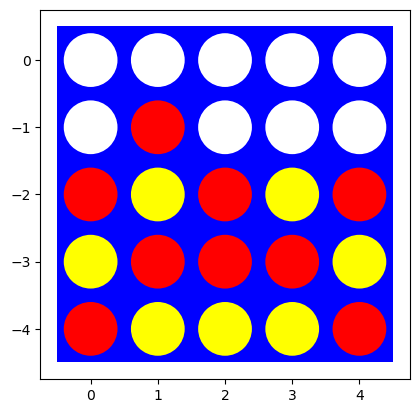

Board_5 before:


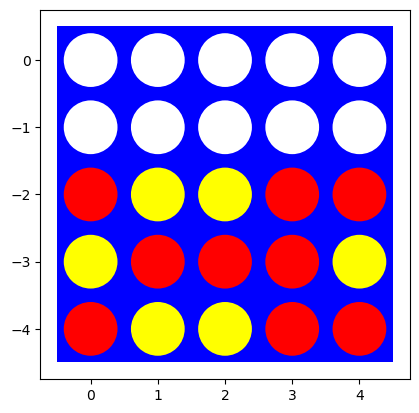

Board_5 after:


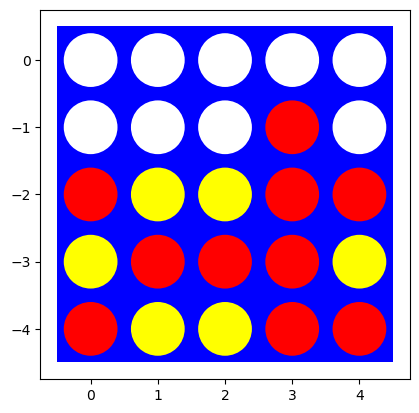

In [11]:
# Create a 4x4 board that is close to winning for red
board_1 = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1],
         [0, -1,-1,-1, 1],
         [0, -1,-1,-1, 1]]

print('Board_1 before:')
visualize(board_1)
agent = alphabeta_agent(1)
action = agent.play(board_1)
new_board = result(board_1, action, agent.player)
print('Board_1 after:')
visualize(new_board)

board_2 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 1, -1, 1],
           [0, 1,-1,-1, -1],
           [1, -1,-1,-1, 1]]

print('Board_2 before:')
visualize(board_2)
agent = alphabeta_agent(1)
action = agent.play(board_2)
new_board = result(board_2, action, agent.player)
print('Board_2 after:')
visualize(new_board)

board_3 = [[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [1, 0, -1, -1, 1],
              [1, 1,-1,-1, -1],
              [1, -1,-1,-1, 1]]

print('Board_3 before:')
visualize(board_3)
agent = alphabeta_agent(1)
action = agent.play(board_3)
new_board = result(board_3, action, agent.player)
print('Board_3 after:')
visualize(new_board)

board_4 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, -1, 1, -1, 1],
           [-1, 1,1,1, -1],
           [1, -1,-1,-1, 1]]

print('Board_4 before:')
visualize(board_4)
agent = alphabeta_agent(1)
action = agent.play(board_4)
new_board = result(board_4, action, agent.player)
print('Board_4 after:')
visualize(new_board)

board_5 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, -1, -1, 1, 1],
           [-1, 1,1,1, -1],
           [1, -1,-1, 1, 1]]

print('Board_5 before:')
visualize(board_5)
agent = alphabeta_agent(1)
action = agent.play(board_5)
new_board = result(board_5, action, agent.player)
print('Board_5 after:')
visualize(new_board)

In [12]:
def empty_board(shape):
    return np.full(shape=shape, fill_value=0)

Tie


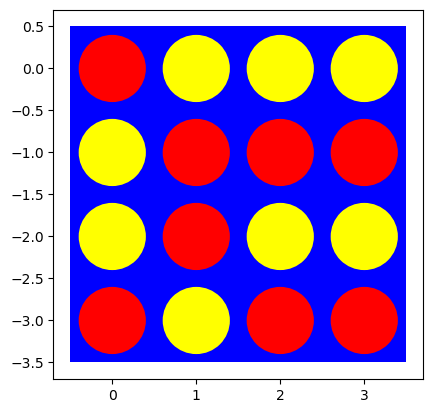

In [11]:
# DONT NEED THIS
player1 = alphabeta_agent(1) # red
player2 = alphabeta_agent(-1) # yellow

# Make a smaller board for testing (5x5)
board = empty_board((4, 4))
while True:
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player1.play(board)
    board = result(board, action, player1.player)
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player2.play(board)
    board = result(board, action, player2.player)

visualize(board)

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [12]:
import time

player1 = alphabeta_agent(1) # red
player2 = alphabeta_agent(-1) # yellow

# Make a 4x4 board
board1 = [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [1, -1, -1, 1],
         [-1, 1,1,1]]

# Make a 4x5 board
board2 = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [-1, 1, -1, 1, -1],
         [1, -1,1,-1, 1]]

# Make a 4x6 board
board3 = [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, -1, 0, 0],
         [-1, 1, -1, 1, -1, 0],
         [1, -1,1,-1, 1, 0]]

# Make a 4x7 board
board4 = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, -1, -1, 0, 0, 0],
         [-1, 1, -1, 1, -1, 0, 0],
         [1, -1,1,-1, 1, -1, 1]]

# Make a 4x8 board
board5 = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, -1, -1, 0, 0, 0],
         [-1, 1, -1, 1, -1, 0, 0],
         [1, -1,1,-1, 1, -1, 1]]

boards = [board1, board2, board3, board4, board5]
player1 = alphabeta_agent(1) # red

for board in boards:
    # visualize(board)
    start = time.time()
    action = player1.play(board)
    end = time.time()
    # visualize(result(board, action, player1.player))
    print(f'Time to make a move on a {len(board)}x{len(board[0])} board:', end-start)


Time to make a move on a 4x4 board: 0.024281978607177734


Time to make a move on a 4x5 board: 0.1196444034576416
Time to make a move on a 4x6 board: 0.7650911808013916
Time to make a move on a 4x7 board: 4.165822267532349
Time to make a move on a 4x7 board: 4.200954914093018


### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [61]:
# Implement a move ordering strategy that prioritizes moves that will win the game
# and then moves that will block the opponent from winning the game. I will also prioritize
# moves that are closer to the center of the board.

def move_ordering(board, player, moves):
    winning_moves = [move for move in moves if is_winning_move(board, move, player)]
    if winning_moves:
        return winning_moves
    
    blocking_moves = [move for move in moves if is_blocking_move(board, move, player)]
    if blocking_moves:
        return blocking_moves
    
    return moves

def is_winning_move(board, move, player):
    new_board = result(board, move, player)
    return check_for_wins(new_board) == player

def is_blocking_move(board, move, player):
    new_board = result(board, move, player)
    return check_for_wins(new_board) == -player

In [62]:
# Override the max_value and min_value functions to use the move ordering strategy 
# when deciding which moves to search first.

def alphabetasearch_ordering(board, player):
    _, move = max_value_ordering(board, player, -np.inf, np.inf)
    return move

def max_value_ordering(board, player, alpha, beta):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return max value of min_value
    v = -np.inf
    best_action = None
    moves = available_actions(board)
    ordered_moves = move_ordering(board, player, moves)
    for action in ordered_moves:
        new_board = result(board, action, player)
        value, _ = min_value_ordering(new_board, player, alpha, beta)
        if value > v:
            v, best_action = value, action
        alpha = max(alpha, v)
        if v >= beta:
            break
    return v, best_action

def min_value_ordering(board, player, alpha, beta):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return min value of max_value
    v = np.inf
    best_action = None
    moves = available_actions(board)
    ordered_moves = move_ordering(board, player, moves)
    for action in ordered_moves:
        new_board = result(board, action, player)
        value, _ = max_value_ordering(new_board, player*-1, alpha, beta)
        if value < v:
            v, best_action = value, action
        beta = min(beta, v)
        if v <= alpha:
            break
    return v, best_action

class alphabeta_agent_ordering:
    def __init__(self, player):
        self.player = player
    def play(self, board):
        return alphabetasearch_ordering(board, self.player)

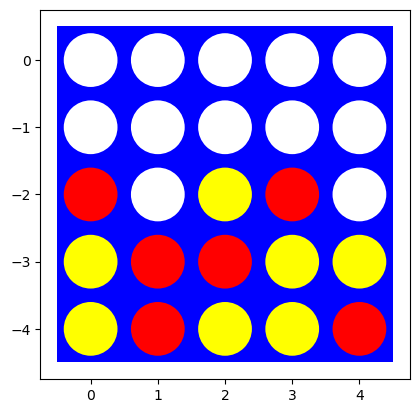

Time without move ordering: 1.5528895854949951 seconds
Time with move ordering: 0.6327517032623291 seconds


In [15]:
board = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [1, 0, -1, 1, 0],
         [-1, 1,1,-1, -1],
         [-1, 1,-1,-1, 1]]

visualize(board)
player1 = alphabeta_agent(1) # red
player2 = alphabeta_agent_ordering(-1) # yellow

start = time.time()
action = player1.play(board)
end = time.time()
print(f'Time without move ordering: {end-start} seconds')

start = time.time()
action = player2.play(board)
end = time.time()
print(f'Time with move ordering: {end-start} seconds')


# PUT INTO TABLE LATER

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

Player 1 wins


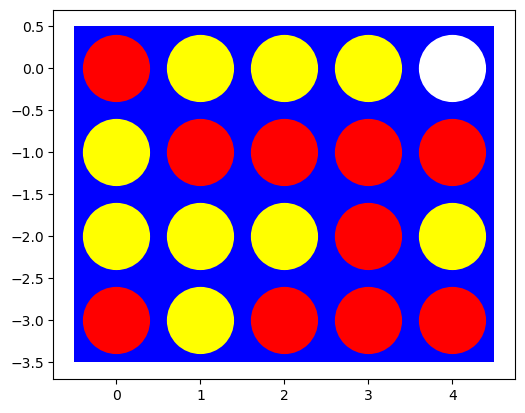

In [16]:
# Your code/ answer goes here.

# Use move ordering to prioritize moves that will win the game and then moves that will 
# block the opponent from winning the game. Also prioritize moves that are closer to the 
# center of the board.

board = empty_board((4, 5))

player1 = alphabeta_agent(1) # red
player2 = alphabeta_agent_ordering(-1) # yellow

while True:
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player1.play(board)
    board = result(board, action, player1.player)
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player2.play(board)
    board = result(board, action, player2.player)

visualize(board)

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
# Let the minimax agent play against the random agent 100 times.

player1 = alphabeta_agent_ordering(1) # red
player2 = random_agent(-1) # yellow

player1_wins = 0 # red
player2_wins = 0 # yellow
ties = 0

for _ in range(5):
    current_player = player1
    board = empty_board((4, 5))
    while True:
        end = check_for_wins(board)
        if end is not None:
            if end == 1:
                player1_wins += 1
            elif end == -1:
                player2_wins += 1
            else:
                ties += 1
            break
        action = current_player.play(board)
        board = result(board, action, current_player.player)
        current_player = player2 if current_player == player1 else player1

print('Player 1 wins:', player1_wins)
print('Player 2 wins:', player2_wins)
print('Ties:', ties)

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

In [ ]:
# Heuristic Alpha-Beta Tree Search
# Use a cutoff game tree and use heuristic for utility
# Reduce the search cost by restricting the depth of the game tree
# 1. Stop search at a non-terminal state
# 2. Use a heuristic evaluation function to estimate the utility of a non-terminal state

def heuristic(board, player):
    # If player wins, return 1
    if check_for_wins(board) == player:
        return 1
    # If player loses, return -1
    elif check_for_wins(board) == -player:
        return -1
    # If draw, return 0
    elif check_for_wins(board) == 0:
        return 0
    # If game is not over, return None
    else:
        return None

### Cutting off search [10 points]

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [ ]:
# Make sure to use a cutoff depth (dynamic depth) to limit the search space
# If the depth is 0, return the heuristic value of the board
# If the depth is greater than 0, return the max value of the min_value function

def heuristic_search(board, player, depth):
    _, move = max_value_heuristic(board, player, -np.inf, np.inf, depth)
    return move

def max_value_heuristic(board, player, alpha, beta, depth):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return max value of min_value
    if depth == 0:
        return heuristic(board, player), None
    v = float('-inf')
    best_action = None
    for action in available_actions(board):
        new_board = result(board, action, player)
        value, _ = min_value_heuristic(new_board, player, alpha, beta, depth-1)
        if value is not None and value > v:
            v, best_action = value, action
        alpha = max(alpha, v)
        if v >= beta:
            break
    return v, best_action

def min_value_heuristic(board, player, alpha, beta, depth):
    # If terminal state, return utility
    end = check_for_wins(board)
    if end is not None:
        return utility(board, player), None
    # If not terminal state, return min value of max_value
    if depth == 0:
        return heuristic(board, player), None
    v = float('inf')
    best_action = None
    for action in available_actions(board):
        new_board = result(board, action, player)
        value, _ = max_value_heuristic(new_board, player*-1, alpha, beta, depth-1)
        if value is not None and value < v:
            v, best_action = value, action
        beta = min(beta, v)
        if v <= alpha:
            break
    return v, best_action

class heuristic_agent:
    def __init__(self, player, depth):
        self.player = player
        self.depth = depth
    def play(self, board):
        return heuristic_search(board, self.player, self.depth)

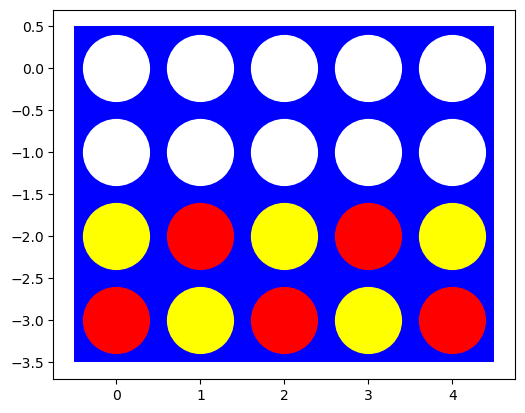

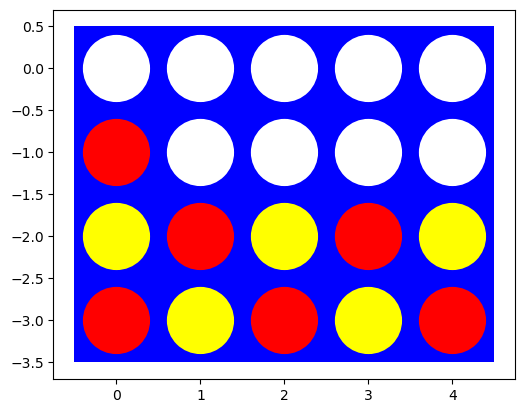

Time to make a move on a 6x7 board with depth 1: 0.0 seconds


In [ ]:
# Experiment with different cutoff depths

player1 = heuristic_agent(1, 4) # red

# Make a 4x5 board
board2 = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [-1, 1, -1, 1, -1],
         [1, -1,1,-1, 1]]

visualize(board2)

start = time.time()
action = player1.play(board2)
end = time.time()
new_board = result(board2, action, player1.player)
visualize(new_board)

print(f'Time to make a move on a 6x7 board with depth 1: {end-start} seconds')


Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [ ]:
# Create a 4x4 board that is close to winning for red
board_1 = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1],
         [0, -1,-1,-1, 1],
         [0, -1,-1,-1, 1]]

print('Board_1 before:')
visualize(board_1)
agent = heuristic_agent(1, 4)
action = agent.play(board_1)
new_board = result(board_1, action, agent.player)
print('Board_1 after:')
visualize(new_board)

board_2 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 1, -1, 1],
           [0, 1,-1,-1, -1],
           [1, -1,-1,-1, 1]]

print('Board_2 before:')
visualize(board_2)
agent = heuristic_agent(1, 4)
action = agent.play(board_2)
new_board = result(board_2, action, agent.player)
print('Board_2 after:')
visualize(new_board)

board_3 = [[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [1, 0, -1, -1, 1],
              [1, 1,-1,-1, -1],
              [1, -1,-1,-1, 1]]

print('Board_3 before:')
visualize(board_3)
agent = heuristic_agent(1, 4)
action = agent.play(board_3)
new_board = result(board_3, action, agent.player)
print('Board_3 after:')
visualize(new_board)

board_4 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, -1, 1, -1, 1],
           [-1, 1,1,1, -1],
           [1, -1,-1,-1, 1]]

print('Board_4 before:')
visualize(board_4)
agent = heuristic_agent(1, 4)
action = agent.play(board_4)
new_board = result(board_4, action, agent.player)
print('Board_4 after:')
visualize(new_board)

board_5 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, -1, -1, 1, 1],
           [-1, 1,1,1, -1],
           [1, -1,-1, 1, 1]]

print('Board_5 before:')
visualize(board_5)
agent = heuristic_agent(1, 4)
action = agent.play(board_5)
new_board = result(board_5, action, agent.player)
print('Board_5 after:')
visualize(new_board)

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.
import timeit

player1 = heuristic_agent(1, 3) # red

# Make a 4x4 board
board1 = [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [1, -1, -1, 1],
         [-1, 1,1,1]]

# Make a 4x5 board
board2 = [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [-1, 1, -1, 1, -1],
         [1, -1,1,-1, 1]]

# Make a 4x6 board
board3 = [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, -1, 0, 0],
         [-1, 1, -1, 1, -1, 0],
         [1, -1,1,-1, 1, 0]]

# Make a 4x7 board
board4 = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, -1, -1, 0, 0, 0],
         [-1, 1, -1, 1, -1, 0, 0],
         [1, -1,1,-1, 1, -1, 1]]

# Make a 4x8 board
board5 = [[0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, -1, -1, 0, 0, 0, 0],
          [-1, 1, -1, 1, -1, 0, 0, 0],
          [1, -1,1,-1, 1, -1, 1, 1]]
          

boards = [board1, board2, board3, board4, board5]

for board in boards:
    # visualize(board)
    start = timeit.default_timer()
    action = player1.play(board)
    end = timeit.default_timer()
    # visualize(result(board, action, player1.player))
    print(f'Time to make a move on a {len(board)}x{len(board[0])} board:', end-start)

Time to make a move on a 4x4 board: 0.0019522000002325512
Time to make a move on a 4x5 board: 0.002801399998134002
Time to make a move on a 4x6 board: 0.002796400000079302
Time to make a move on a 4x7 board: 0.004830100002436666
Time to make a move on a 4x8 board: 0.008101000003080117


### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Create a new heuristic that takes into account the number of pieces in a row
# and the number of pieces in a column

def heuristic2(board, player):
    # A simple heuristic function that evaluates the desirability of a state for the player.
    score = 0

    # Evaluate player's moves
    for row in range(len(board)):
        for col in range(len(board[0])):
            if board[row][col] == player:
                score += 1  # Increase score for player's pieces

    # Evaluate opponent's moves
    opponent = -player
    for row in range(len(board)):
        for col in range(len(board[0])):
            if board[row][col] == opponent:
                score -= 1  # Decrease score for opponent's pieces

    return score


def forward_pruning_minimax(board, player, alpha, beta, depth, heuristic_function):
    # Minimax search with alpha-beta pruning and forward pruning based on a heuristic function.
    
    end = check_for_wins(board)
    if end is not None or depth == 0:
        return heuristic_function(board, player), None

    v = float('-inf')
    best_action = None

    for action in available_actions(board):
        new_board = result(board, action, player)
        value, _ = forward_pruning_minimax(new_board, player, alpha, beta, depth - 1, heuristic_function)

        if value > v:
            v, best_action = value, action

        alpha = max(alpha, v)

        if v >= beta:
            break  # Prune remaining branches if beta cutoff

    return v, best_action

class forward_pruning_agent:
    def __init__(self, player, depth, heuristic_function):
        self.player = player
        self.depth = depth
        self.heuristic_function = heuristic_function

    def play(self, board):
        _, move = forward_pruning_minimax(board, self.player, float('-inf'), float('inf'), self.depth, self.heuristic_function)
        return move
    

Tie


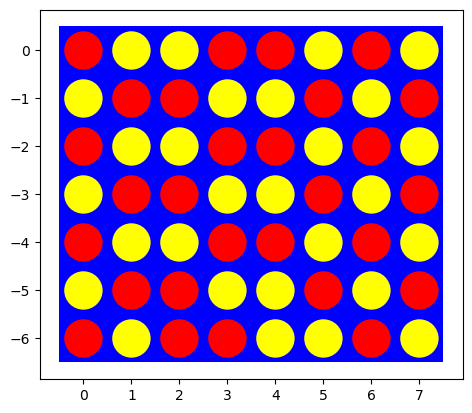

In [ ]:
player1 = forward_pruning_agent(1, 3, heuristic2) # red
player2 = heuristic_agent(-1, 2) # yellow

board = empty_board((7, 8))

while True:
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player1.play(board)
    board = result(board, action, player1.player)
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player2.play(board)
    board = result(board, action, player2.player)

visualize(board)

## Challenge task [+ 10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+10 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [26]:
# Pure Monte Carlo Search
# Do simulations starting from the current state of the game, and track which of the 
# possible moves from the current position has the highest win percentage.

def monte_carlo_search(board, player, simulations):
    # Monte Carlo search with a fixed number of simulations.
    # Returns the best action to take based on the simulations.

    # Create a dictionary to store the number of wins and number of simulations for each action.
    action_statistics = {}

    for action in available_actions(board):
        action_statistics[action] = [0, 0]

    for _ in range(simulations):
        # Do a simulation starting from the current state of the game.
        # Track which of the possible moves from the current position has the highest win percentage.
        action = np.random.choice(available_actions(board))

        # Create a copy of the board
        new_board = np.copy(board)

        # Play the action on the board
        new_board = result(new_board, action, player)

        # Simulate the rest of the game
        winner = simulate(new_board, action, player)

        # Update the number of wins and number of simulations for the action
        action_statistics[action][1] += 1
        if winner == player:
            action_statistics[action][0] += 1

    # Return the action with the highest win percentage
    # Check for divide by 0 error
    if action_statistics:
        return max(action_statistics, key=lambda x: action_statistics[x][0] / action_statistics[x][1])
    else:
        return np.random.choice(available_actions(board))

def simulate(new_board, action, player):
    # Simulate the rest of the game
    current_player = player
    while True:
        end = check_for_wins(new_board)
        if end is not None:
            return end
        action = np.random.choice(available_actions(new_board))
        new_board = result(new_board, action, current_player)
        current_player = current_player*-1

class monte_carlo_agent:
    def __init__(self, player, simulations):
        self.player = player
        self.simulations = simulations
    def play(self, board):
        return monte_carlo_search(board, self.player, self.simulations)

Board_1 before:


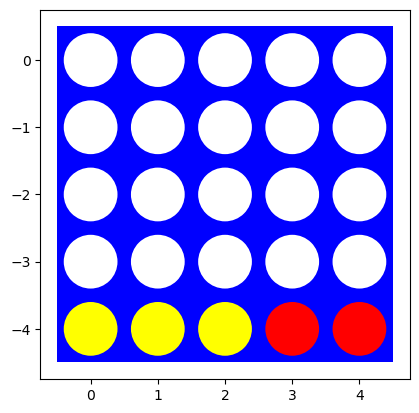

Board_1 after:


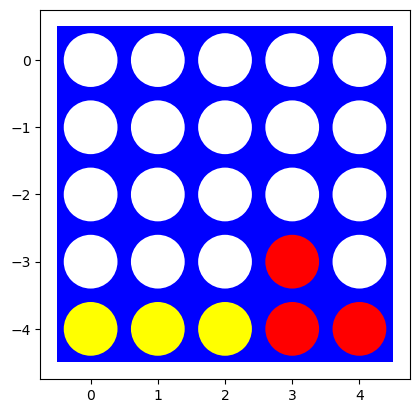

In [40]:
board_1 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [-1,-1,-1,1,1]]

print('Board_1 before:')
visualize(board_1)
agent = monte_carlo_agent(1, 300)
action = agent.play(board_1)
new_board = result(board_1, action, agent.player)

print('Board_1 after:')
visualize(new_board)

### Best First Move

Use Pure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

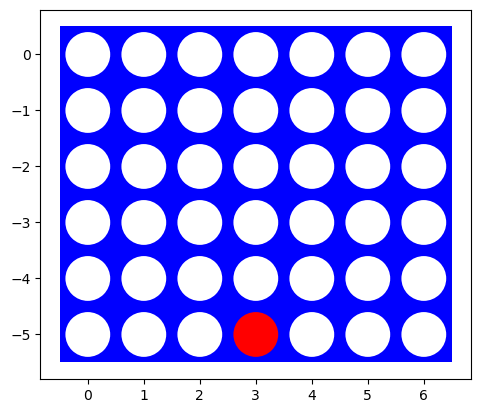

In [57]:
board = empty_board((6, 7))

player1 = monte_carlo_agent(1, 300) # red
player2 = alphabeta_agent(-1) # yellow

# Make first move
action = player1.play(board)
board = result(board, action, player1.player)

visualize(board)

Based on the above code, it can be seen that the Pure Monte Carlo agent chooses the middle column as the "best" first move. By deciding that this is the best first move the agent is assuming that the middle column is the most likely to lead to a win.

Player 2 wins


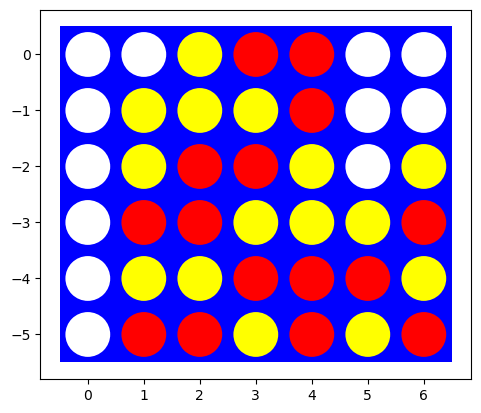

In [74]:
board = empty_board((6,7))

player1 = monte_carlo_agent(1, 400) # red
player2 = monte_carlo_agent(-1, 400) # yellow

while True:
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player1.play(board)
    board = result(board, action, player1.player)
    end = check_for_wins(board)
    if end is not None:
        if end == 1:
            print('Player 1 wins')
        elif end == -1:
            print('Player 2 wins')
        else:
            print('Tie')
        break
    action = player2.play(board)
    board = result(board, action, player2.player)

visualize(board)